
<font size="+2.5">**Zufallsstichproben als Auswahlverfahren bei Sportgroßveranstaltungen**</font> 
<br><br>

<font size="+1.2">👩🏻‍💻  Schätzung des Mittelwerts der Grundgesamtheit und Bestimmung des Stichprobenumfangs.</font>  

 
<br> 

<div>
    <img src="images/EURO24_allianzarena.png" alt="Image description" width="800px" style="float: left; margin-right: 10px;"/>
</div>
<br><br>

<br>




<br><br>
<font size="+1.8">**⚽ Planspiel EURO 2024**</font> 
<br><br>
<font size="+1.2">Eine Analyse der Zufriedenheit von Stadionbesuchern des Halbfinalspiels der EURO 2024 in München.</font>

In [58]:
# Prep basic packages
import os
import IPython
import json
import pandas as pd
import numpy as np
import random
import string
from scipy.stats import norm

# Display current working directory
print("Current working directory:", os.getcwd())

Current working directory: /Users/Kathi/Code/projects/sampling


### Erzeugen synthetischer Daten 

**Was tun wir?**

Wir erzeugen ein Datenset von **20.000 befragten Besuchern der Allianz Arena** beim **Halbfinale** zwischen 🇫🇷 **Frankreich und 🇪🇸 Spanien**.

Das Datenset enthält die folgenden **Variablen**:
- Nummer: laufende Nummer [1, ...,20.000]  
- ID: zufällig generierte Buchstaben/Zahlenkombination [str]
- Nationalitaet [Spanien, Frankreich, Deutschland, England, Niederlande, Italien]
- Herkunftsland [Spanien, Frankreich, Deutschland, England, Niederlande, Italien]
- Alter [18, ..., 75]
- Geschlecht [Maennlich, Weiblich, Divers]
- Eikommen (in €) [10.000, ..., 150.000]

- soziales Milieu (Ableitung aus Adresse) [Elite, Obere Mittelschicht, Kern-Mittelschicht, Untere Mittelschicht, Arbeiterklasse, Prekäre Schicht]
- Sitz (bestehend aus Block [A, ..., F], Reihe [1, ...]

**Annahme**:
<br>20.000 Gästesitzplätze stehen in der Allianz Arena zur Verfügung, d.h. Datenset entspricht einer Vollerhebung. 

In [38]:
import pandas as pd
import numpy as np
import random
import string

# Helper functions to generate random data
def generate_id(length=8):
    return ''.join(random.choices(string.ascii_uppercase + string.digits, k=length))

def generate_age():
    return random.randint(18, 75)

def generate_income():
    return round(random.uniform(10000, 150000), 2)

def generate_gender():
    return random.choice(['Maennlich', 'Weiblich', 'Divers'])

# Define the distribution for countries and nationalities
countries_nationalities = {
    'Spanien': 0.4,
    'Frankreich': 0.4,
    'Deutschland': 0.05,
    'Italien': 0.05,
    'England': 0.05,
    'Niederlande': 0.05
}

# Create the dataset
num_records = 20000
data = []

for i in range(1, num_records + 1):
    nummer = i
    id = generate_id()
    herkunftsland = np.random.choice(list(countries_nationalities.keys()), p=list(countries_nationalities.values()))
    nationalität = np.random.choice(list(countries_nationalities.keys()), p=list(countries_nationalities.values()))
    alter = generate_age()
    geschlecht = generate_gender()
    haushaltseinkommen = generate_income()
    
    # Ensure a few mismatches between Herkunftsland and Nationalität
    if random.random() < 0.05:
        nationalität = np.random.choice(list(countries_nationalities.keys()))
    
    data.append([nummer, id, herkunftsland, nationalität, alter, geschlecht, haushaltseinkommen])

# Create the DataFrame
df = pd.DataFrame(data, columns=['Nummer', 'ID', 'Herkunftsland', 'Nationalitaet', 'Alter', 'Geschlecht', 'Haushaltseinkommen'])

# Adjust age and income to follow a normal distribution
np.random.seed(42)  # For reproducibility

# Normal distribution for age
mean_age = 35
std_age = 10
ages = np.random.normal(mean_age, std_age, num_records).astype(int)
ages = np.clip(ages, 18, 75)  # Ensuring age stays within realistic bounds

# Normal distribution for income
mean_income = 50000
std_income = 15000
incomes = np.random.normal(mean_income, std_income, num_records)
incomes = np.clip(incomes, 10000, 150000)  # Ensuring income stays within realistic bounds

# Gender distribution adjustment
gender_choices = ['Maennlich', 'Weiblich', 'Divers']
gender_probs = [0.70, 0.29, 0.01]
genders = np.random.choice(gender_choices, num_records, p=gender_probs)

# Update the DataFrame
df['Alter'] = ages
df['Haushaltseinkommen'] = incomes
df['Geschlecht'] = genders

# Definition der Funktion zur Zuordnung des sozialen Milieus
def soziales_milieu(income):
    if income > 80000:
        return 'Elite'
    elif 60000 < income <= 80000:
        return 'Obere Mittelschicht'
    elif 40000 < income <= 60000:
        return 'Kern-Mittelschicht'
    elif 30000 < income <= 40000:
        return 'Untere Mittelschicht'
    elif 20000 < income <= 30000:
        return 'Arbeiterklasse'
    else:
        return 'Prekäres Milieu'

# Anwendung der Funktion auf die Spalte 'Haushaltseinkommen' zur Erstellung der neuen Spalte 'soziales Milieu'
df['soziales Milieu'] = df['Haushaltseinkommen'].apply(soziales_milieu)

import pandas as pd
import numpy as np
import random
import string

# Neudefinition der Anzahl der Datensätze
num_records = 20000

# Aktuellen DataFrame anpassen (falls er noch nicht 20.000 Einträge hat)
if len(df) < num_records:
    additional_rows = num_records - len(df)
    additional_data = df.sample(n=additional_rows, replace=True).reset_index(drop=True)
    df = pd.concat([df, additional_data]).reset_index(drop=True)

# Erstellen der "Sitz"-Spalte
ränge = 4
blöcke = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
reihen_pro_block = 20
sitze_pro_reihe = 25

sitze = []
for rang in range(1, ränge + 1):
    for block in blöcke:
        for reihe in range(1, reihen_pro_block + 1):
            for nummer in range(1, sitze_pro_reihe + 1):
                sitze.append(f"{rang}.{block}.{reihe}.{nummer}")
                if len(sitze) == num_records:
                    break
            if len(sitze) == num_records:
                break
        if len(sitze) == num_records:
            break
    if len(sitze) == num_records:
        break

# Überprüfen, ob alle Plätze vergeben sind
assert len(sitze) == num_records, "Die Anzahl der Sitzplätze stimmt nicht mit der Anzahl der Datensätze überein."

# Zuweisen der Sitzplätze zum DataFrame
df['Sitz'] = sitze

# Adjusting Herkunftsland and Nationalität
mismatch_prob = 0.05

for i in range(num_records):
    if np.random.rand() < mismatch_prob:
        possible_nationalities = list(countries_nationalities.keys())
        possible_nationalities.remove(df.loc[i, 'Herkunftsland'])
        df.loc[i, 'Nationalitaet'] = np.random.choice(possible_nationalities)
    else:
        df.loc[i, 'Nationalitaet'] = df.loc[i, 'Herkunftsland']

# Save the updated CSV to your specified folder
file_path = "/Users/Kathi/Code/projects/sampling/data/stadionbesucher_euro2024_final.csv"
df.to_csv(file_path, index=False)

print(f"CSV file saved to {file_path}")

# Ausgabe des angepassten DataFrames
print(df.head())


CSV file saved to /Users/Kathi/Code/projects/sampling/data/stadionbesucher_euro2024_final.csv
   Nummer        ID Herkunftsland Nationalitaet  Alter Geschlecht  \
0       1  EW2RCXLW       Spanien       Spanien     39   Weiblich   
1       2  IYIOEV5K       Italien       Italien     33  Maennlich   
2       3  SOV1QUY5    Frankreich    Frankreich     41   Weiblich   
3       4  I2L3FBDH       Spanien       Spanien     50  Maennlich   
4       5  STCXEZXA       Italien       Italien     32  Maennlich   

   Haushaltseinkommen       soziales Milieu     Sitz  
0        55224.293715    Kern-Mittelschicht  1.A.1.1  
1        54249.853888    Kern-Mittelschicht  1.A.1.2  
2        35952.202313  Untere Mittelschicht  1.A.1.3  
3        58693.763326    Kern-Mittelschicht  1.A.1.4  
4        27648.759866        Arbeiterklasse  1.A.1.5  


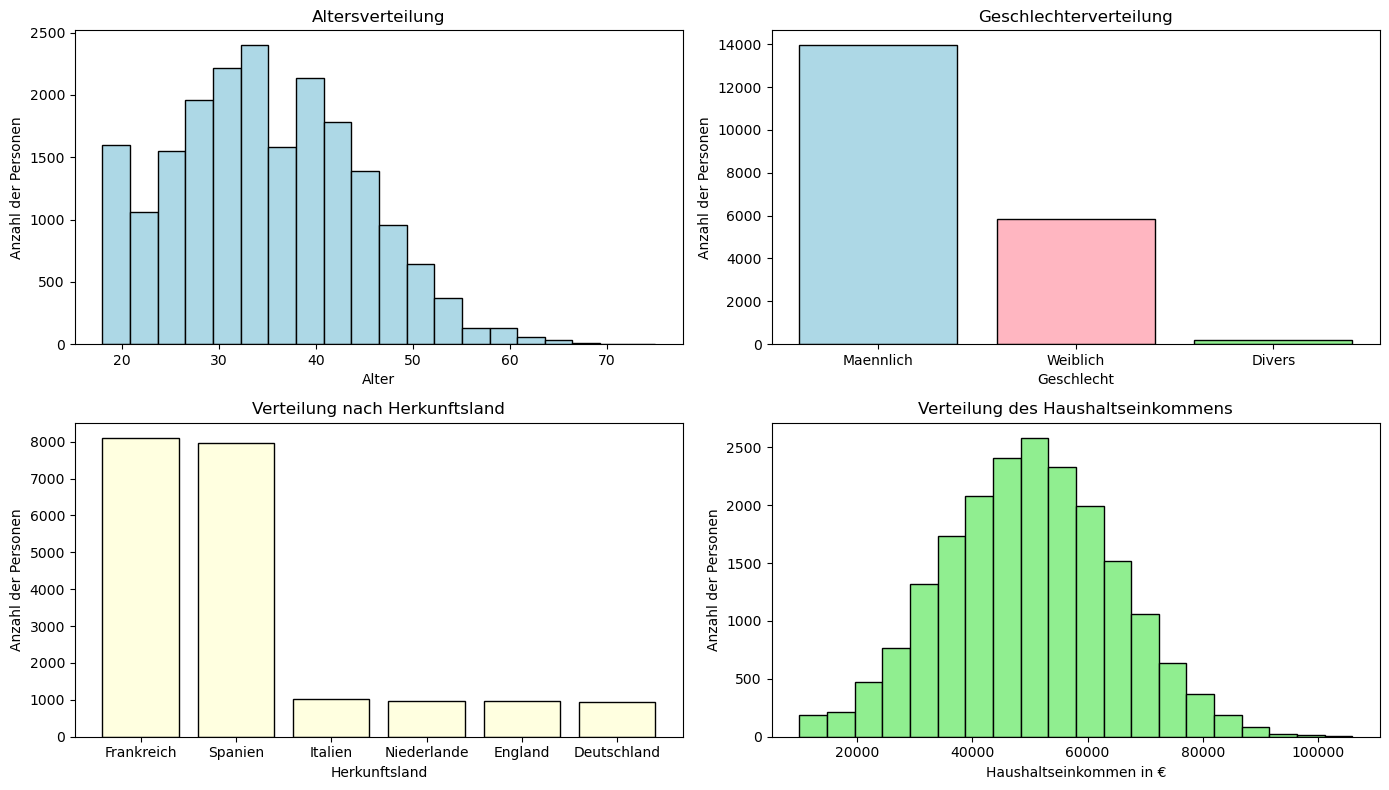

In [75]:
import matplotlib.pyplot as plt

# Define figure size
plt.figure(figsize=(14, 8))

# Age distribution
plt.subplot(2, 2, 1)
plt.hist(df['Alter'], bins=20, color='lightblue', edgecolor='black')
plt.title('Altersverteilung')
plt.xlabel('Alter')
plt.ylabel('Anzahl der Personen')

# Gender distribution
plt.subplot(2, 2, 2)
gender_counts = df['Geschlecht'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color=['lightblue', 'lightpink', 'lightgreen'], edgecolor='black')
plt.title('Geschlechterverteilung')
plt.xlabel('Geschlecht')
plt.ylabel('Anzahl der Personen')

# Herkunftsland distribution
plt.subplot(2, 2, 3)
country_counts = df['Herkunftsland'].value_counts()
plt.bar(country_counts.index, country_counts.values, color='lightyellow', edgecolor='black')
plt.title('Verteilung nach Herkunftsland')
plt.xlabel('Herkunftsland')
plt.ylabel('Anzahl der Personen')

# Household income distribution
plt.subplot(2, 2, 4)
plt.hist(df['Haushaltseinkommen'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Verteilung des Haushaltseinkommens')
plt.xlabel('Haushaltseinkommen in €')
plt.ylabel('Anzahl der Personen')

plt.tight_layout()
plt.show()



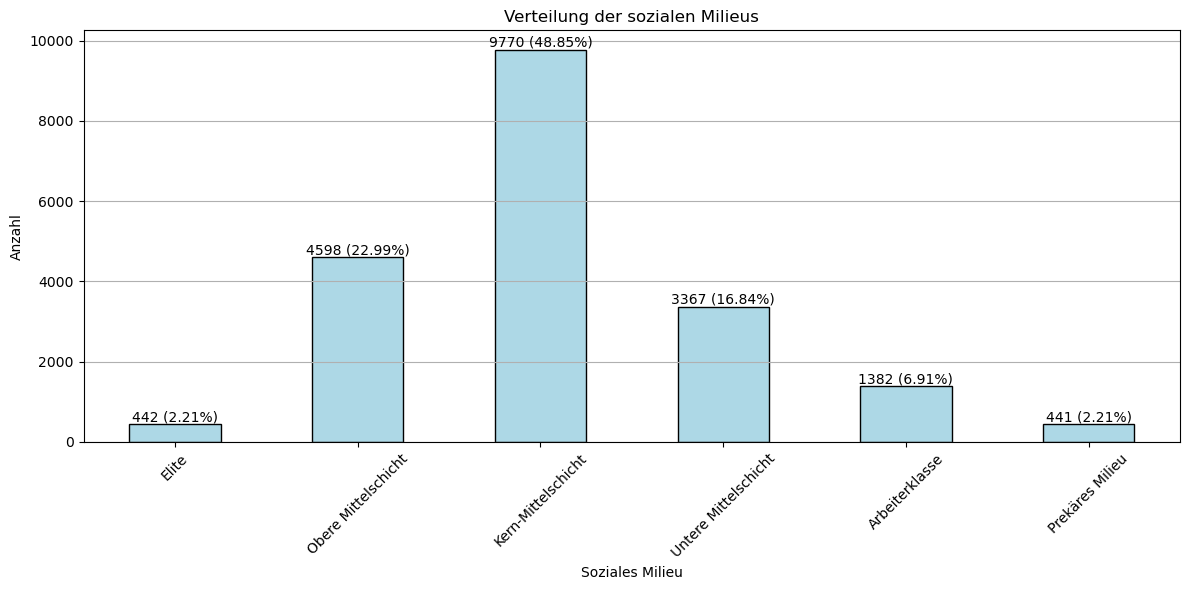

In [78]:
# Erstellen eines Balkendiagramms zur Visualisierung der Verteilung der Variable "soziales Milieu"
def visualisiere_verteilung_soziales_milieu(df, spalte='soziales Milieu'):
    # Definierte Reihenfolge der sozialen Milieus
    milieus_reihenfolge = ['Elite', 'Obere Mittelschicht', 'Kern-Mittelschicht', 'Untere Mittelschicht', 'Arbeiterklasse', 'Prekäres Milieu']
    
    # Berechnen der Verteilung in der angegebenen Reihenfolge
    verteilung = df[spalte].value_counts().reindex(milieus_reihenfolge)
    verteilung_relative = (verteilung / len(df)) * 100
    
    plt.figure(figsize=(12, 6))
    verteilung.plot(kind='bar', color='lightblue', edgecolor='black')
    plt.title('Verteilung der sozialen Milieus')
    plt.xlabel('Soziales Milieu')
    plt.ylabel('Anzahl')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    
    # Anzeige der absoluten und relativen Werte über den Balken
    for i, (v_abs, v_rel) in enumerate(zip(verteilung, verteilung_relative)):
        plt.text(i, v_abs + 0.5, f'{v_abs} ({v_rel:.2f}%)', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Aufrufen der Funktion zur Visualisierung der Verteilung
visualisiere_verteilung_soziales_milieu(df)


<br>

### Schätzung Mittelwert der Grundgesamtheit und Bestimmung Stichprobenumfang

<br>

**Berechnung arithmetisches Mittel Haushalteinkommen der Stadionbesucher**

$$
\mu = \frac{1}{N} \sum_{i=1}^{N} x_i
$$

Dabei ist:
- \\( \mu \\)   das durchschnittliche Haushaltseinkommen
- \\( N \\)  die Gesamtanzahl der Stadionbesucher (Grundgesamtheit)
- \\( x_i \\)  das Haushaltseinkommen des i-ten Besuchers

In [33]:
# Berechnung des durchschnittlichen Haushaltseinkommens
durchschnittliches_haushaltseinkommen = df['Haushaltseinkommen'].mean()

# Ausgabe des Ergebnisses
print(f"Das durchschnittliche Haushaltseinkommen (µ) der Grundgesamtheit N ist: {durchschnittliches_haushaltseinkommen:.2f} €")


Das durchschnittliche Haushaltseinkommen (µ) der Grundgesamtheit N ist: 49867.20 €


<br>

**Berechnung Varianz Haushaltseinkommen der Stadionbesucher**

$$
\sigma^2 = \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2
$$

Dabei ist:
- \\( \sigma^2 \\) die Varianz des Haushaltseinkommens
- \\( \mu \\)   das durchschnittliche Haushaltseinkommen
- \\( N \\)  die Gesamtanzahl der Stadionbesucher (Grundgesamtheit)
- \\( x_i \\)  das Haushaltseinkommen des i-ten Besuchers


In [31]:
# Berechnung der Varianz des Haushaltseinkommens
varianz_haushaltseinkommen = df['Haushaltseinkommen'].var(ddof=0)

# Ausgabe des Ergebnisses
print(f"Die Varianz (σ²) des Haushaltseinkommens der Grundgesamtheit N ist: {varianz_haushaltseinkommen:.2f} €²")


Die Varianz (σ²) des Haushaltseinkommens der Grundgesamtheit N ist: 222283539.15 €²


<br>

**Berechnung Varianz und Standardabweichung (Standardfehler) Haushaltseinkommen der Stichprobe**

Das Stichprobenmittel einer Stichprobe $\bar{\textit{x}}$ vom Umfang *n* stellt einen unverzerrten Schätzer für \\( \mu \\) dar. Da sich je nach realisierter Stichprobe ein anderes Stichprobenmittel ergeben kann, lassen sich darüber hinaus Varianz und die Standardabweichung (Standardfehler) bestimmen.

Die **Varianz einer Stichprobe** wird berechnet mit:

$$
s^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

Dabei ist:
- \\( s^2 \\) die Varianz der Stichprobe
- \\( n \\) der Umfang der Stichprobe
- \\( x_i \\) der i-te Wert der Stichprobe
- \\( \bar{x} \\) das Stichprobenmittel


Die **Standardabweichung einer Stichprobe** wird berechnet mit:

$$
s = \sqrt{s^2} = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

Dabei ist:
- \\( s \\) die Standardabweichung der Stichprobe
- \\( s^2 \\) die Varianz der Stichprobe
- \\( n \\) der Umfang der Stichprobe
- \\( x_i \\) der i-te Wert der Stichprobe
- \\( \bar{x} \\) das Stichprobenmittel


In [57]:
# Berechnung der Varianz und Standardabweichung für die Stichprobe
def berechne_varianz_und_std(stichprobe, spalte):
    varianz = stichprobe[spalte].var(ddof=1)
    standardabweichung = stichprobe[spalte].std(ddof=1)
    return varianz, standardabweichung

# Beispiel: Ziehen einer 5%-Stichprobe
stichprobe_5_prozent = einfache_zufallsstichprobe(df, 5)

# Berechnung der Varianz und Standardabweichung für die Spalte 'Haushaltseinkommen'
varianz, standardabweichung = berechne_varianz_und_std(stichprobe_5_prozent, 'Haushaltseinkommen')

# Ausgabe der Ergebnisse
print(f"Die Varianz (s^2) des Haushaltseinkommens der Stichprobe ist: {varianz:.2f} €²")
print(f"Die Standardabweichung (s) des Haushaltseinkommens der Stichprobe ist: {standardabweichung:.2f} €")


Die Varianz (s^2) des Haushaltseinkommens der Stichprobe ist: 206333426.85 €²
Die Standardabweichung (s) des Haushaltseinkommens der Stichprobe ist: 14364.31 €


<br>

**Berechnung Konfidenzintervall der Stichprobe für das arithmetische Mittel des Haushaltseinkommens der Stadionbesucher**

Das **Konfidenzintervall** gibt jenen Bereich an, in dem der wahre Populationsparameter (hier arithmetisches Mittel des Haushaltseinkommens) mit einer bestimmten Wahrscheinlichkeit (Vertrauenswahrscheinlichkeit) liegt.

Jedes Mal, wenn wir eine Stichprobe ziehen, kann der Mittelwert dieser Stichprobe leicht unterschiedlich sein. Das Konfidenzintervall berücksichtigt diese Variabilität und gibt uns eine Spanne, die die Unsicherheit unserer Schätzung widerspiegelt.
Ein engeres Konfidenzintervall bedeutet, dass wir eine genauere Schätzung haben, während ein breiteres Intervall auf mehr Unsicherheit hinweist.

Das Konfidenzintervall für den Parameter \( \mu \) (das durchschnittliche Haushaltseinkommen) bei einer Irrtumswahrscheinlichkeit \(\alpha = 0.05\) (Vertrauenswahrscheinlichkeit 95%) lautet:

$$
\bar{x} \pm z_{\alpha/2} \left( \frac{s}{\sqrt{n}} \right)
$$

Dabei ist:
- \\( \bar{x} \\) das Stichprobenmittel
- \\( z_{\alpha/2} \\) der kritische Wert aus der Standardnormalverteilung für eine Vertrauenswahrscheinlichkeit von 95% (z-Wert = 1.96 für 95%)
- \\( s \\) die Standardabweichung der Stichprobe
- \\( n \\) die Stichprobengröße


In [63]:
# Berechnung des Konfidenzintervalls für das Stichprobenmittel
def berechne_konfidenzintervall(stichprobe, spalte, alpha=0.05):
    n = len(stichprobe)
    mittelwert = stichprobe[spalte].mean()
    std_abw = stichprobe[spalte].std(ddof=1)
    z_wert = norm.ppf(1 - alpha / 2)
    margin_of_error = z_wert * (std_abw / np.sqrt(n))
    
    untere_grenze = mittelwert - margin_of_error
    obere_grenze = mittelwert + margin_of_error
    
    return untere_grenze, obere_grenze

# Annahme: `stichprobe_5_prozent` DataFrame ist bereits erstellt
# Berechnung des Konfidenzintervalls für das Haushaltseinkommen
untere_grenze, obere_grenze = berechne_konfidenzintervall(stichprobe_5_prozent, 'Haushaltseinkommen')

# Ausgabe der Ergebnisse
print(f"Das 95%-Konfidenzintervall für das durchschnittliche Haushaltseinkommen beträgt: [{untere_grenze:.2f}, {obere_grenze:.2f}] €")


Das 95%-Konfidenzintervall für das durchschnittliche Haushaltseinkommen beträgt: [48480.44, 50261.02] €


<br>

**Berechnung notwendiger Stichprobenumfang**

Der **notwendige Stichprobenumfang** \( n \) wird berechnet mit:

$$
n = \left( \frac{z_{\alpha/2} \cdot \sigma}{E} \right)^2
$$

Dabei ist:
- \\( z_{\alpha/2} \\) der kritische Wert aus der Standardnormalverteilung für eine Vertrauenswahrscheinlichkeit von 95% (z-Wert = 1.96 für 95%)
- \\( \sigma \\) die Standardabweichung der Grundgesamtheit
- \\( E \\) die maximale Fehlerbreite (Breite des Konfidenzintervalls)
- \\( n \\) der notwendige Stichprobenumfang


In [74]:
# Gegebene Parameter
alpha = 0.05
z_wert = norm.ppf(1 - alpha / 2)
breite_konfidenzintervall = 1000  # Breite des Konfidenzintervalls (E)
standardabweichung = df['Haushaltseinkommen'].std(ddof=1)  # Standardabweichung der Grundgesamtheit
grundgesamtheit = len(df)  # Größe der Grundgesamtheit

# Berechnung des notwendigen Stichprobenumfangs
n = (z_wert * standardabweichung / (breite_konfidenzintervall / 2))**2
n = np.ceil(n)  # Aufrunden auf die nächste ganze Zahl

# Berechnung des relativen Anteils an der Grundgesamtheit
relativer_anteil = (n / grundgesamtheit) * 100

# Ausgabe der Ergebnisse
print(f"Der notwendige Stichprobenumfang für ein Konfidenzintervall von {breite_konfidenzintervall} € beträgt: {n:.0f}")
print(f"Das entspricht einem Anteil von {relativer_anteil:.2f}% der Grundgesamtheit.")

Der notwendige Stichprobenumfang für ein Konfidenzintervall von 1000 € beträgt: 3418
Das entspricht einem Anteil von 17.09% der Grundgesamtheit.


<br>

### Planspiel: Ziehung Stichprobe und Vergleich Kosten & Stichenprobenfehler je Team

In [52]:
# Ziehung einfacher Stichprobe aus einem Datenframe df mit veränderlichen Prozentsatz (Parameter)
def einfache_zufallsstichprobe(df, prozent):
    stichprobengröße = int(len(df) * (prozent / 100))
    zufallsstichprobe = df.sample(n=stichprobengröße, random_state=1)
    return zufallsstichprobe

# Beispiel: Ziehen einer 5%-Stichprobe
stichprobe_5_prozent = einfache_zufallsstichprobe(df, 5)

# Ausgabe der Stichprobe
print(stichprobe_5_prozent.head())

#Speichern der Stichprobe in einer CSV-Datei
stichprobe_5_prozent.to_csv("/Users/Kathi/Code/projects/sampling/data/stichprobe_5_prozent.csv", index=False)
print(f"CSV file saved to {file_path}")

       Nummer        ID Herkunftsland Nationalitaet  Alter Geschlecht  \
11456   11457  AV5XDB63    Frankreich    Frankreich     54  Maennlich   
16528   16529  YIVDK683       England       England     38   Weiblich   
3253     3254  OO3OJUEQ       Spanien       Spanien     45  Maennlich   
18614   18615  EXY4EQMW       Spanien       Spanien     31  Maennlich   
1544     1545  KKZZZGWQ    Frankreich   Niederlande     28  Maennlich   

       Haushaltseinkommen       soziales Milieu      Sitz  
11456        39273.056428  Untere Mittelschicht  3.C.19.7  
16528        64387.604376   Obere Mittelschicht   4.D.2.4  
3253         49657.794589    Kern-Mittelschicht  1.G.11.4  
18614        28842.518390        Arbeiterklasse  4.H.5.15  
1544         60473.983047   Obere Mittelschicht  1.D.2.20  
CSV file saved to /Users/Kathi/Code/projects/sampling/data/stadionbesucher_euro2024_final.csv


In [79]:
# Berechnet die Kosten für die Zufallsstichprobe, basierend auf dem gewählten Verfahren.
def berechne_kosten(df, prozent, verfahren):
    # Kosten pro Verfahren
    kosten_pro_verfahren = {
        'A': 1.20,
        'B': 0.70,
        'C': 1.80,
        'D': 2.20
    }
    
    # Überprüfen, ob das Verfahren gültig ist
    if verfahren not in kosten_pro_verfahren:
        raise ValueError("Ungültiges Verfahren. Wählen Sie 'A', 'B', 'C' oder 'D'.")
    
    # Größe der Stichprobe berechnen
    stichprobe = einfache_zufallsstichprobe(df, prozent)
    stichprobengröße = len(stichprobe)
    
    # Kosten berechnen
    kosten = stichprobengröße * kosten_pro_verfahren[verfahren]
    
    return kosten

# Beispiel: Berechnung der Kosten für eine 5%-Stichprobe mit Verfahren 'A'
prozent = 5
verfahren = 'A'
kosten = berechne_kosten(df, prozent, verfahren)

# Ausgabe der Kosten
print(f"Die Kosten für eine {prozent}%-Stichprobe mit Verfahren '{verfahren}' betragen: {kosten:.2f} €")


Die Kosten für eine 5%-Stichprobe mit Verfahren 'A' betragen: 1200.00 €


In [70]:
# Funktion zur einfachen Zufallsstichprobe
def einfache_zufallsstichprobe(df, prozent):
    stichprobengröße = int(len(df) * (prozent / 100))
    zufallsstichprobe = df.sample(n=stichprobengröße, random_state=1)
    return zufallsstichprobe

# Berechnung des Konfidenzintervalls für das Stichprobenmittel
def berechne_konfidenzintervall(stichprobe, spalte, alpha=0.05):
    n = len(stichprobe)
    mittelwert = stichprobe[spalte].mean()
    std_abw = stichprobe[spalte].std(ddof=1)
    z_wert = norm.ppf(1 - alpha / 2)
    margin_of_error = z_wert * (std_abw / np.sqrt(n))
    
    untere_grenze = mittelwert - margin_of_error
    obere_grenze = mittelwert + margin_of_error
    
    return untere_grenze, obere_grenze

# Beispiel: Berechnung der Kosten und des Konfidenzintervalls für 8 verschiedene Optionen
optionen = [
    {'verfahren': 'A', 'prozent': 5},
    {'verfahren': 'B', 'prozent': 10},
    {'verfahren': 'C', 'prozent': 15},
    {'verfahren': 'D', 'prozent': 20},
    {'verfahren': 'A', 'prozent': 25},
    {'verfahren': 'B', 'prozent': 30},
    {'verfahren': 'C', 'prozent': 35},
    {'verfahren': 'D', 'prozent': 40}
]

# Erstellen einer Liste zur Speicherung der Ergebnisse
ergebnisse = []

# Berechnung der Kosten und des Konfidenzintervalls für jede Option
for i, option in enumerate(optionen):
    stichprobe = einfache_zufallsstichprobe(df, option['prozent'])
    kosten = berechne_kosten(df, option['prozent'], option['verfahren'])
    untere_grenze, obere_grenze = berechne_konfidenzintervall(stichprobe, 'Haushaltseinkommen')
    konfid_intervall_breite = obere_grenze - untere_grenze
    
    ergebnisse.append({
        'Option': i + 1,
        'Verfahren': option['verfahren'],
        'Stichprobengröße': option['prozent'],
        'Kosten': kosten,
        'Konfidenzintervall': f"[{untere_grenze:.2f}, {obere_grenze:.2f}]",
        'Breite Konfidenzintervall': konfid_intervall_breite
    })

# Erstellung eines DataFrames aus den Ergebnissen
df_ergebnisse = pd.DataFrame(ergebnisse)

# Hervorhebung der drei Optionen mit dem engsten Konfidenzintervall
df_ergebnisse['Highlight'] = df_ergebnisse['Breite Konfidenzintervall'].rank(method='min').apply(lambda x: 'background-color: yellow' if x <= 3 else '')

# Entfernen der Highlight-Spalte für die Ausgabe
highlight = df_ergebnisse.pop('Highlight')

# Funktion zur Anwendung der Hervorhebung
def highlight_rows(row):
    return [highlight[row.name]] * len(row)

# Anzeige des DataFrames mit Hervorhebung
styled_df = df_ergebnisse.style.apply(highlight_rows, axis=1)

styled_df


,Option,Verfahren,Stichprobengröße,Kosten,Konfidenzintervall,Breite Konfidenzintervall
0,1,A,5,700.000000,"[48480.44, 50261.02]",1780.585704
1,2,B,10,2400.000000,"[48983.68, 50263.24]",1279.558825
2,3,C,15,5400.000000,"[49276.61, 50322.12]",1045.514278
3,4,D,20,8800.000000,"[49511.51, 50424.04]",912.525591
4,5,A,25,3500.000000,"[49567.58, 50390.57]",822.989027
5,6,B,30,7200.000000,"[49586.24, 50345.60]",759.358990
6,7,C,35,12600.000000,"[49569.34, 50269.68]",700.338753
7,8,D,40,17600.000000,"[49566.48, 50218.75]",652.268876
